<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/master/Sql_Pandas_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sqlite3


In [11]:
df = pd.read_excel('/content/Hotel Bookings.xlsx')

In [12]:
conn = sqlite3.connect('hotel.db')

df.to_sql('hotel',conn,if_exists='replace',index=False)

conn.close()

In [14]:
conn = sqlite3.connect('hotel.db')

conn.commit()
user = pd.read_sql('SELECT * FROM hotel',conn)

In [16]:
pd.read_sql('SELECT * FROM hotel',conn)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01 00:00:00
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01 00:00:00
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02 00:00:00
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02 00:00:00
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06 00:00:00
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07 00:00:00
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07 00:00:00
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07 00:00:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Number of hotel in the given dataset

In [18]:
pd.read_sql('''select hotel,count(*) from hotel
           group by hotel
           order by hotel''',conn)

,hotel,count(*)
0,City Hotel,79330
1,Resort Hotel,40060


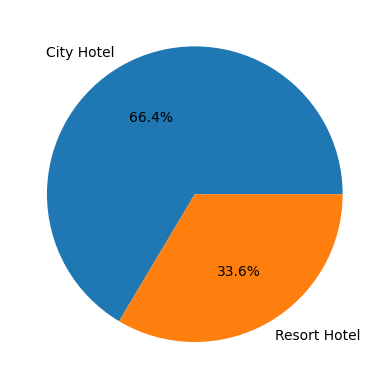

In [21]:
x=pd.read_sql('''select hotel,count(*) from hotel
           group by hotel
           order by hotel''',conn)
plt.pie(x['count(*)'], labels=x['hotel'], autopct='%1.1f%%')
plt.show()

1. How many bookings were canceled?


In [22]:
pd.read_sql('''select is_canceled,count(*) from hotel
           group by is_canceled
           order by is_canceled''',conn)

,is_canceled,count(*)
0,0,75166
1,1,44224


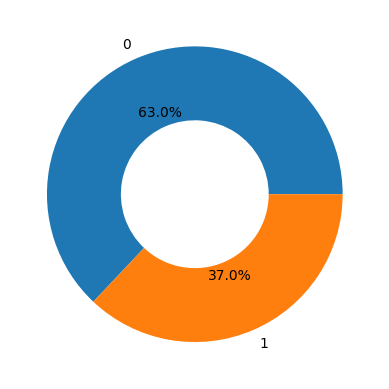

In [25]:
x=pd.read_sql('''select is_canceled,count(*) from hotel
           group by is_canceled
           order by is_canceled''',conn)
plt.pie(x['count(*)'], labels=x['is_canceled'], autopct='%1.1f%%',wedgeprops=dict(width=0.5))
plt.show()

2. What is the average lead time for bookings?


In [26]:
pd.read_sql('''select avg(lead_time) from hotel''',conn)

,avg(lead_time)
0,104.011416


3. What are the top 5 countries with the most bookings?


In [27]:
pd.read_sql('''select country,count(*) from hotel
           group by country
           order by count(*) desc
           limit 5''',conn)

,country,count(*)
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287


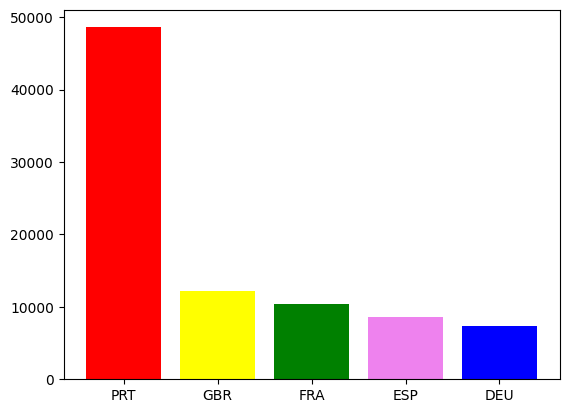

In [30]:
x=pd.read_sql('''select country,count(*) from hotel
           group by country
           order by count(*) desc
           limit 5''',conn)
plt.bar(x['country'],x['count(*)'],color=['red','yellow','green','violet','blue'])
plt.show()

4. How many repeated guests are there?


In [31]:
pd.read_sql('''select count(*) from hotel
           where is_repeated_guest=1''',conn)

,count(*)
0,3810


5. What is the average ADR (Average Daily Rate) for all bookings?


In [63]:
pd.read_sql('''select arrival_date_month,avg(adr) from hotel
           group by arrival_date_month
           order by avg(adr) desc''',conn)

,arrival_date_month,avg(adr)
0,August,140.111523
1,July,126.788013
2,June,116.672192
3,May,108.695516
4,September,105.049657
5,April,100.380790
6,October,87.908879
7,December,81.076776
8,March,80.679646
9,November,73.794962


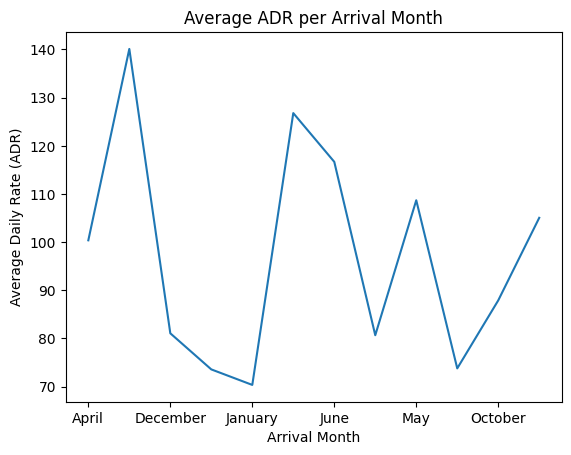

In [61]:
df.groupby('arrival_date_month')['adr'].mean().plot(kind='line')
plt.xlabel('Arrival Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average ADR per Arrival Month')
plt.show()


6. How many bookings requested parking spaces?


In [33]:
pd.read_sql('''select count(*) from hotel
           where required_car_parking_spaces>0''',conn)

,count(*)
0,7416


7. How many bookings included children?


In [34]:
pd.read_sql('''select count(*) from hotel
           where children>0''',conn)


,count(*)
0,8590


8. What is the most popular meal option?


In [35]:
pd.read_sql('''select meal,count(*) from hotel
           group by meal
           order by count(*) desc''',conn)


,meal,count(*)
0,BB,92310
1,HB,14463
2,SC,10650
3,Undefined,1169
4,FB,798


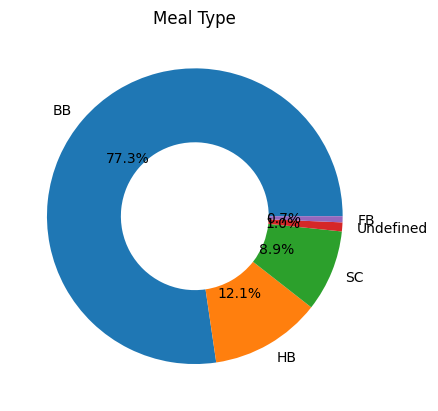

In [40]:
x=pd.read_sql('''select meal,count(*) from hotel
           group by meal
           order by count(*) desc''',conn)
plt.pie(x['count(*)'], labels=x['meal'], autopct='%1.1f%%',wedgeprops=dict(width=0.5))
plt.title('Meal Type')
plt.show()

9. What is the total number of special requests across all bookings?


In [42]:
pd.read_sql('''select total_of_special_requests,count(*) from hotel
           group by total_of_special_requests''',conn)

,total_of_special_requests,count(*)
0,0,70318
1,1,33226
2,2,12969
3,3,2497
4,4,340
5,5,40


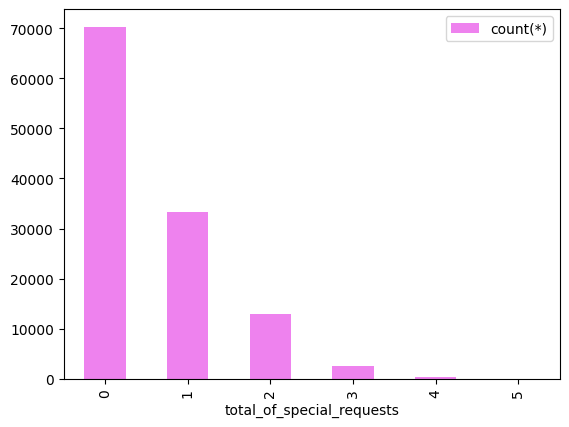

In [47]:
x=pd.read_sql('''select total_of_special_requests,count(*) from hotel
           group by total_of_special_requests''',conn)
x.plot(kind='bar',x='total_of_special_requests',y='count(*)',color='violet')
plt.show()

10. How many bookings were made through Travel Agents?


In [52]:
pd.read_sql('''select count(*) from hotel
           where agent>0''',conn)

,count(*)
0,103050


In [56]:
pd.read_sql('''SELECT COUNT(*) FROM hotel WHERE distribution_channel = 'TA/TO' ''', conn)


,COUNT(*)
0,97870


11. What is the average number of days bookings spend on the waiting list?


In [57]:
pd.read_sql('''select avg(days_in_waiting_list) from hotel''',conn)

,avg(days_in_waiting_list)
0,2.321149


12. Which market segment has the most bookings?


In [58]:
pd.read_sql('''select market_segment,count(*) from hotel
           group by market_segment
           order by count(*) desc
           limit 1''',conn)

,market_segment,count(*)
0,Online TA,56477


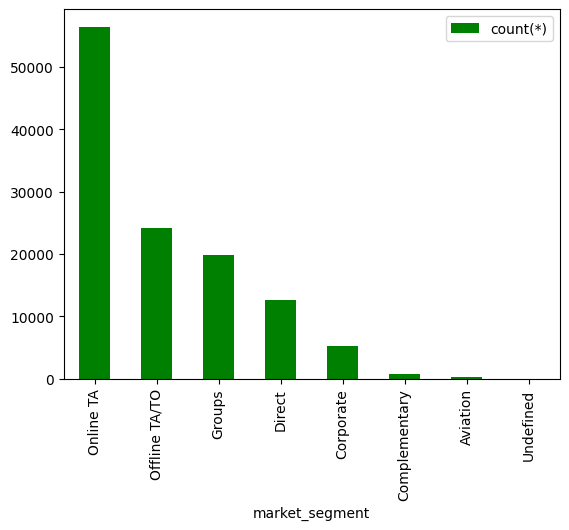

In [60]:
x=pd.read_sql('''select market_segment,count(*) from hotel
           group by market_segment
           order by count(*) desc
           ''',conn)
x.plot(kind='bar',x='market_segment',y='count(*)',color='g')
plt.show()

13. What percentage of bookings were canceled?


In [65]:
pd.read_sql('''select (count(*) * 100.0 / (select count(*) from hotel))
              as cancellation_rate from hotel
              WHERE is_canceled = 1;
                                  ''',conn)

,cancellation_rate
0,37.041628


14. What is the average number of adults per booking?


In [66]:
pd.read_sql('''select avg(adults) from hotel''',conn)

,avg(adults)
0,1.856403


15. How many bookings had changes to the reservation?


In [67]:
pd.read_sql('''select count(*) from hotel
           where reserved_room_type!=assigned_room_type''',conn)

,count(*)
0,14917


In [71]:
pd.read_sql('''select  count(*) from hotel where booking_changes > 0''',conn)




,count(*)
0,18076


16. What is the total number of babies in all bookings?


In [72]:
pd.read_sql('''select sum(babies) from hotel''',conn)

,sum(babies)
0,949


17. Which year had the most bookings?


In [75]:
pd.read_sql('''SELECT arrival_date_year, COUNT(*) AS num_bookings
FROM hotel
GROUP BY arrival_date_year
ORDER BY num_bookings DESC
LIMIT 1;
''',conn)

,arrival_date_year,num_bookings
0,2016,56707


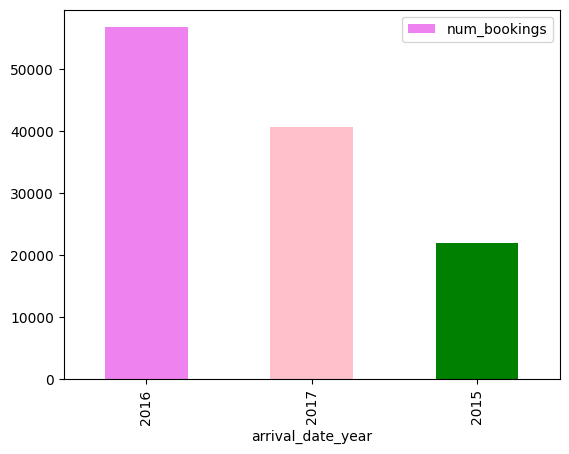

In [77]:
x=pd.read_sql('''SELECT arrival_date_year, COUNT(*) AS num_bookings
FROM hotel
GROUP BY arrival_date_year
ORDER BY num_bookings DESC ;
''',conn)
x.plot(kind='bar', x='arrival_date_year', y='num_bookings',color=['violet','pink','green'])
plt.show()


18. What is the most common room type assigned?

In [79]:
pd.read_sql('''SELECT assigned_room_type, COUNT(*) AS num_assigned
FROM hotel
GROUP BY assigned_room_type
ORDER BY num_assigned DESC
LIMIT 1;''',conn)

,assigned_room_type,num_assigned
0,A,74053


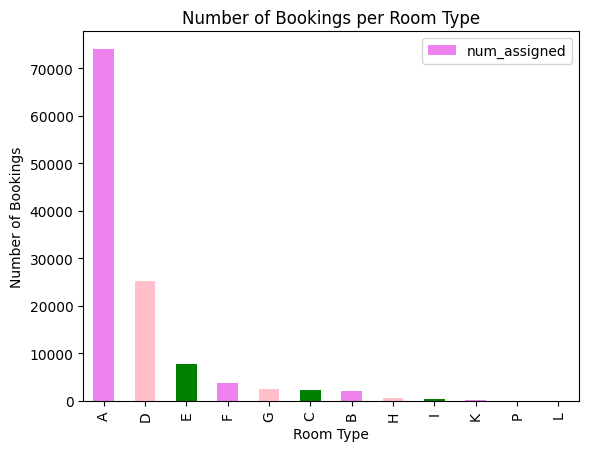

In [98]:
x=pd.read_sql('''SELECT assigned_room_type, COUNT(*) AS num_assigned
FROM hotel
GROUP BY assigned_room_type
ORDER BY num_assigned DESC ''',conn)
x.plot(kind='bar', x='assigned_room_type', y='num_assigned',color=['violet','pink','green'])
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Room Type')
plt.show()

19. Which month had the highest number of bookings?


In [82]:
pd.read_sql('''SELECT arrival_date_month, COUNT(*) AS num_bookings
FROM hotel
GROUP BY arrival_date_month
ORDER BY num_bookings DESC
LIMIT 1;''',conn)

,arrival_date_month,num_bookings
0,August,13877


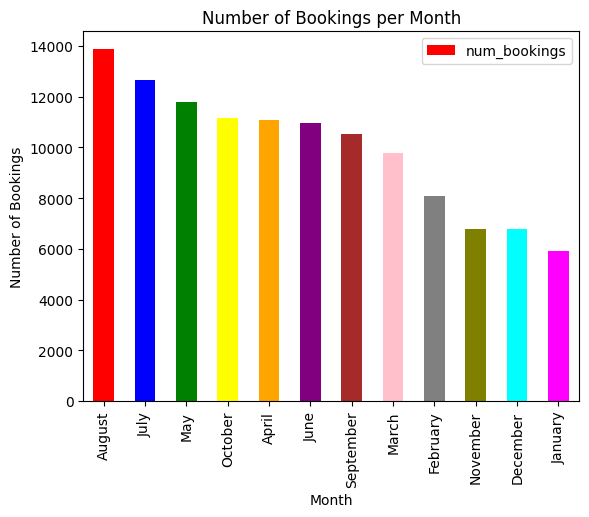

In [85]:
x=pd.read_sql('''SELECT arrival_date_month, COUNT(*) AS num_bookings
FROM hotel
GROUP BY arrival_date_month
ORDER BY num_bookings DESC ;''',conn)
x.plot(kind='bar', x='arrival_date_month', y='num_bookings',color=['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta'])
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Month')
plt.show()



20. What is the most common reservation status?


In [86]:
pd.read_sql('''SELECT reservation_status, COUNT(*) AS num_reservations
FROM hotel
GROUP BY reservation_status
ORDER BY num_reservations DESC
LIMIT 1;''',conn)

,reservation_status,num_reservations
0,Check-Out,75166


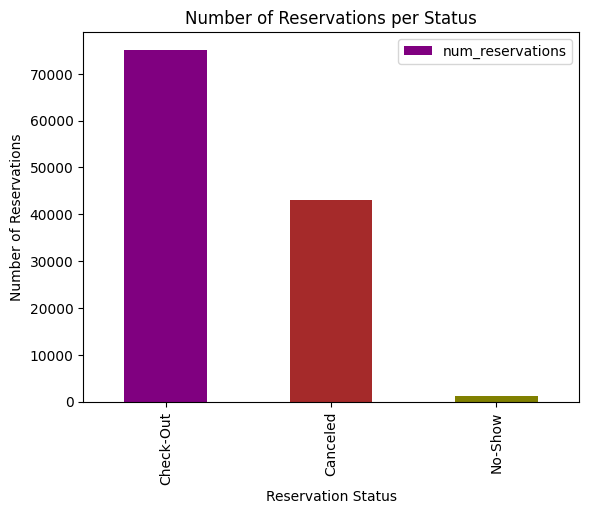

In [95]:
x=pd.read_sql('''SELECT reservation_status, COUNT(*) AS num_reservations
FROM hotel
GROUP BY reservation_status
ORDER BY num_reservations DESC ;''',conn)
x.plot(kind='bar', x='reservation_status', y='num_reservations',color=[ 'purple', 'brown', 'olive'])
plt.xlabel('Reservation Status')
plt.ylabel('Number of Reservations')
plt.title('Number of Reservations per Status')
plt.show()

21. Which room type had the highest number of reservations?


In [96]:
pd.read_sql('''SELECT reserved_room_type, COUNT(*) AS num_reservations
FROM hotel
GROUP BY reserved_room_type
ORDER BY num_reservations DESC
LIMIT 1;''',conn)


,reserved_room_type,num_reservations
0,A,85994


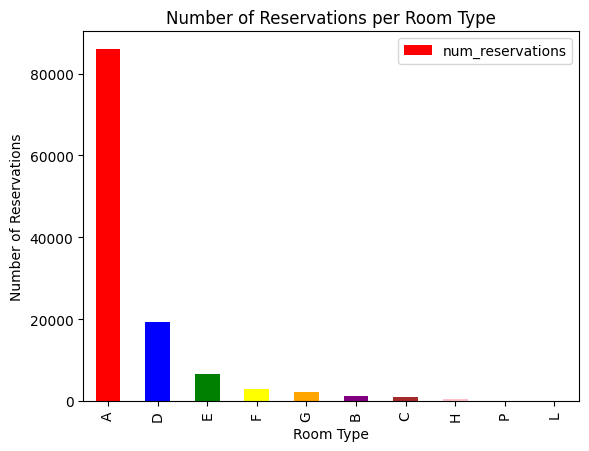

In [99]:
x=pd.read_sql('''SELECT reserved_room_type, COUNT(*) AS num_reservations
FROM hotel
GROUP BY reserved_room_type
ORDER BY num_reservations DESC ;''',conn)
x.plot(kind='bar', x='reserved_room_type', y='num_reservations',color=['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta'])
plt.xlabel('Room Type')
plt.ylabel('Number of Reservations')
plt.title('Number of Reservations per Room Type')
plt.show()

22. Which agent made the most bookings?


In [100]:
pd.read_sql('''SELECT agent, COUNT(*) AS num_bookings
FROM hotel
WHERE agent IS NOT NULL
GROUP BY agent
ORDER BY num_bookings DESC
LIMIT 1;''',conn)


,agent,num_bookings
0,9.0,31961


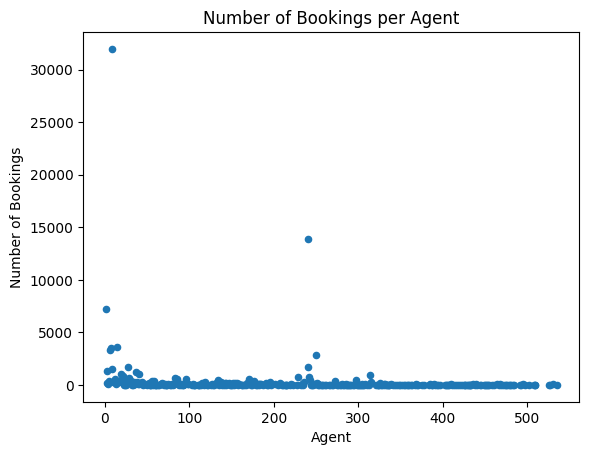

In [106]:
x=pd.read_sql('''SELECT agent, COUNT(*) AS num_bookings
FROM hotel
WHERE agent IS NOT NULL
GROUP BY agent
ORDER BY num_bookings DESC ;''',conn)
x.plot(kind='scatter', x='agent', y='num_bookings')

plt.xlabel('Agent')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Agent')
plt.show()

23. What is the percentage of bookings with babies?


In [107]:
pd.read_sql('''SELECT (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM hotel)) AS babies_percentage
FROM hotel
WHERE babies > 0;''',conn)


,babies_percentage
0,0.768071


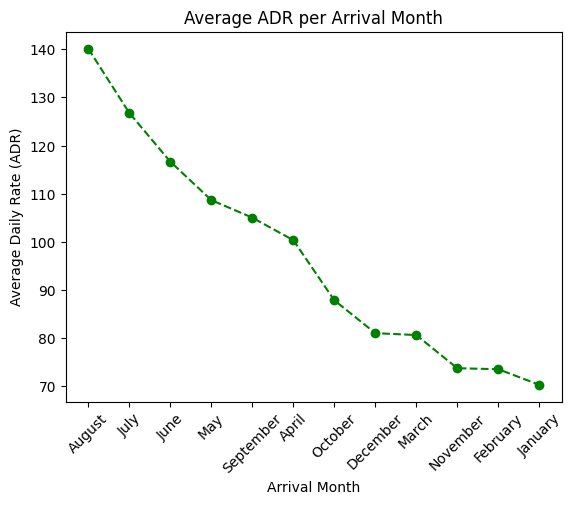

In [110]:
x = pd.read_sql('''select arrival_date_month,avg(adr) from hotel
           group by arrival_date_month
           order by avg(adr) desc''',conn)
plt.plot(x['arrival_date_month'], x['avg(adr)'], marker='o', linestyle='--', color='green')
plt.xlabel('Arrival Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average ADR per Arrival Month')
plt.xticks(rotation=45)
plt.show()

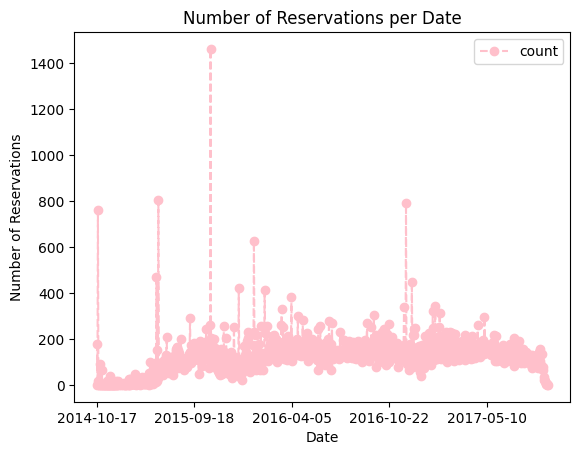

In [121]:
x = pd.read_sql('''SELECT strftime('%Y-%m-%d', reservation_status_date) AS date, COUNT(*) AS count
                   FROM hotel
                   GROUP BY date
                   ORDER BY date''', conn)

x.plot(kind='line', x='date', y='count',marker='o', linestyle='--', color='pink')
plt.xlabel('Date')
plt.ylabel('Number of Reservations')
plt.title('Number of Reservations per Date')
plt.show()

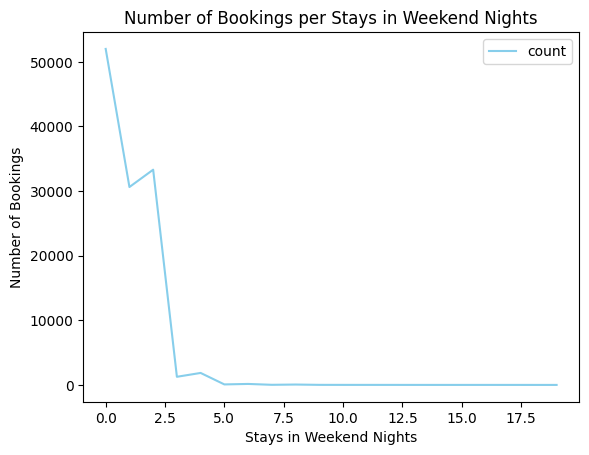

In [124]:
x = pd.read_sql('''SELECT stays_in_weekend_nights, COUNT(*) AS count
                   FROM hotel
                   GROUP BY stays_in_weekend_nights
                   ORDER BY stays_in_weekend_nights''', conn)

x.plot(kind='line', x='stays_in_weekend_nights', y='count', color='skyblue')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Stays in Weekend Nights')
plt.show()

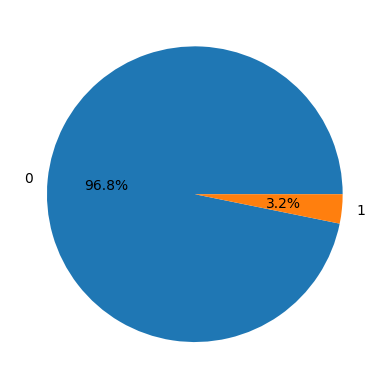

In [127]:
x = pd.read_sql('''select is_repeated_guest,count(*) from hotel
           group by is_repeated_guest
           order by is_repeated_guest''',conn)
plt.pie(x['count(*)'], labels=x['is_repeated_guest'], autopct='%1.1f%%')
plt.show()

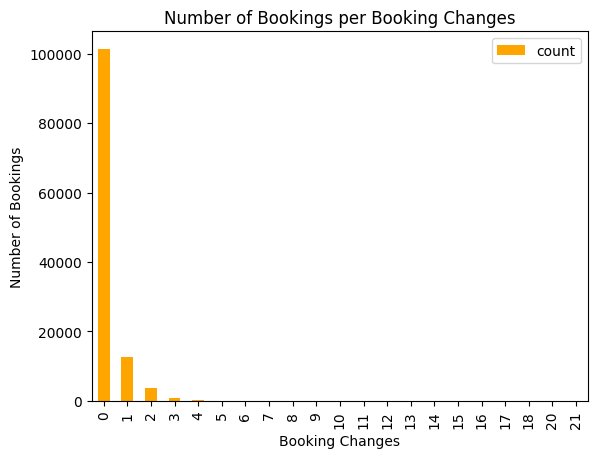

In [130]:
x = pd.read_sql('''SELECT booking_changes, COUNT(*) AS count
                   FROM hotel
                   GROUP BY booking_changes
                   ORDER BY booking_changes''', conn)

x.plot(kind='bar', x='booking_changes', y='count', color='orange')
plt.xlabel('Booking Changes')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Booking Changes')
plt.show()

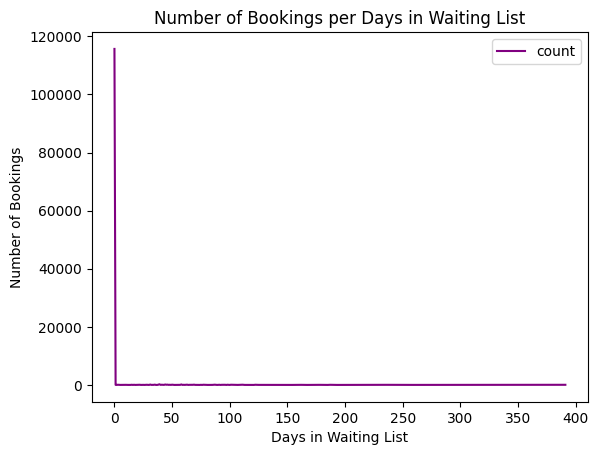

In [133]:

x = pd.read_sql('''SELECT days_in_waiting_list, COUNT(*) AS count
                   FROM hotel
                   GROUP BY days_in_waiting_list
                   ORDER BY days_in_waiting_list''', conn)

x.plot(kind='line', x='days_in_waiting_list', y='count', color='purple')
plt.xlabel('Days in Waiting List')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Days in Waiting List')
plt.show()

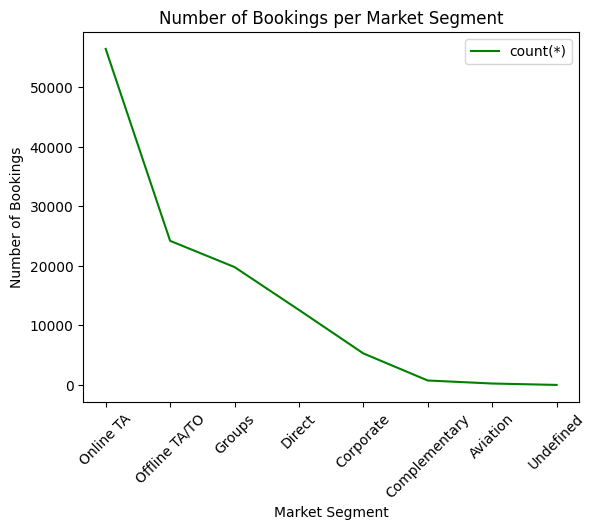

In [139]:
x = pd.read_sql('''select market_segment,count(*) from hotel
           group by market_segment
           order by count(*) desc
           ''',conn)
x.plot(kind='line',x='market_segment',y='count(*)',color='g')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Market Segment')
plt.xticks(rotation=45)
plt.show()


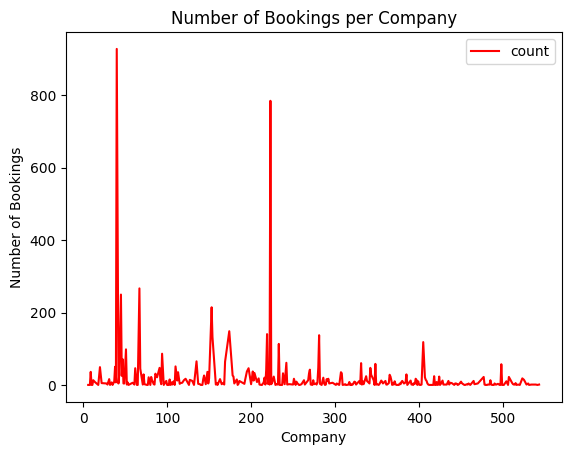

In [141]:
x = pd.read_sql('''SELECT company, COUNT(*) AS count
                   FROM hotel
                   GROUP BY company
                   ORDER BY company''', conn)

x.plot(kind='line', x='company', y='count', color='red')
plt.xlabel('Company')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Company')
plt.show()

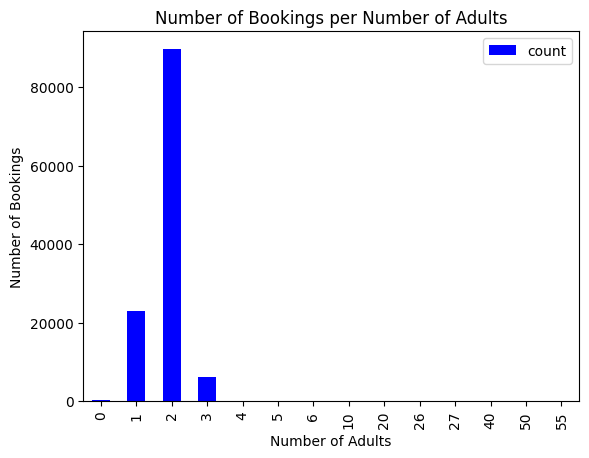

In [143]:
x = pd.read_sql('''SELECT adults, COUNT(*) AS count
                   FROM hotel
                   GROUP BY adults
                   ORDER BY adults''', conn)

x.plot(kind='bar', x='adults', y='count', color='blue')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Number of Adults')
plt.show()

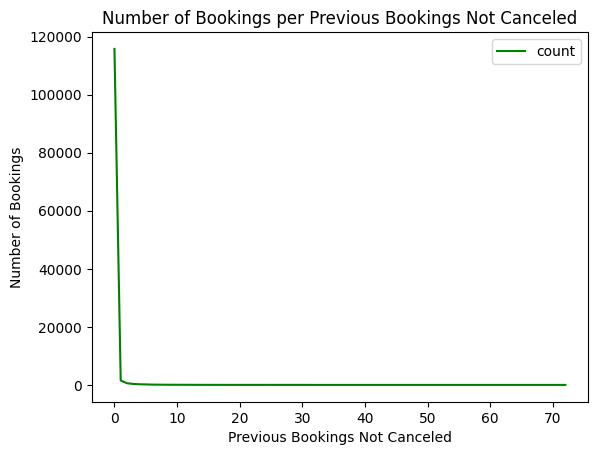

In [146]:
x = pd.read_sql('''SELECT previous_bookings_not_canceled, COUNT(*) AS count
                   FROM hotel
                   GROUP BY previous_bookings_not_canceled
                   ORDER BY previous_bookings_not_canceled''', conn)

x.plot(kind='line', x='previous_bookings_not_canceled', y='count', color='green')
plt.xlabel('Previous Bookings Not Canceled')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Previous Bookings Not Canceled')
plt.show()

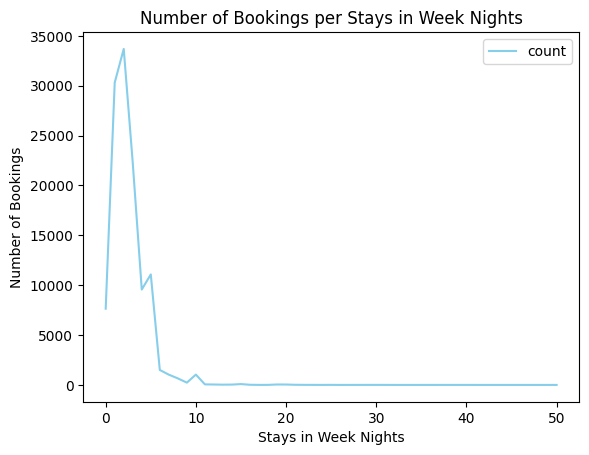

In [148]:
x = pd.read_sql('''SELECT stays_in_week_nights, COUNT(*) AS count
                   FROM hotel
                   GROUP BY stays_in_week_nights
                   ORDER BY stays_in_week_nights''', conn)

x.plot(kind='line', x='stays_in_week_nights', y='count', color='skyblue')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Stays in Week Nights')
plt.show()


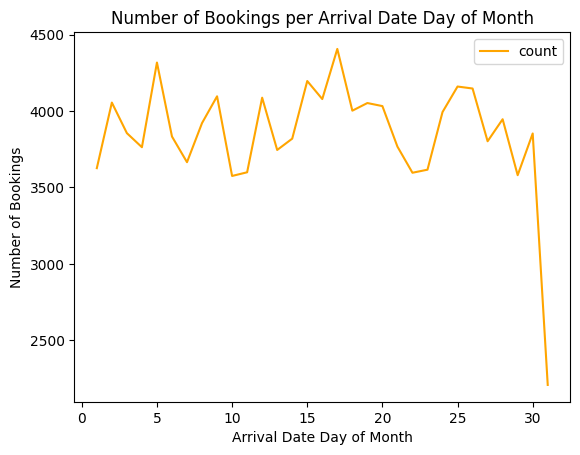

In [150]:
x = pd.read_sql('''SELECT arrival_date_day_of_month, COUNT(*) AS count
                   FROM hotel
                   GROUP BY arrival_date_day_of_month
                   ORDER BY arrival_date_day_of_month''', conn)

x.plot(kind='line', x='arrival_date_day_of_month', y='count', color='orange')
plt.xlabel('Arrival Date Day of Month')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Arrival Date Day of Month')
plt.show()

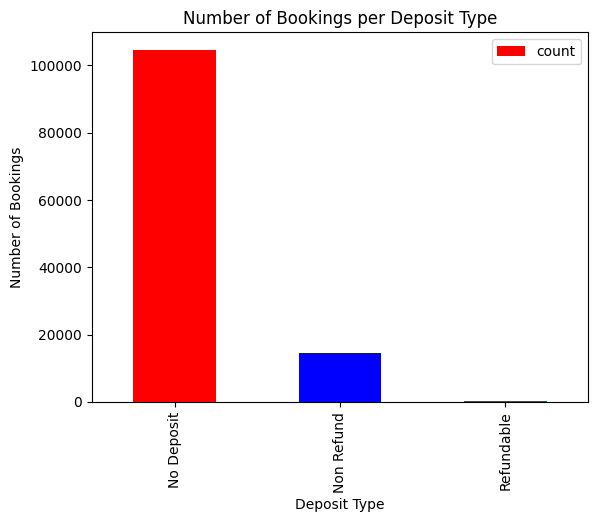

In [152]:
x = pd.read_sql('''SELECT deposit_type, COUNT(*) AS count
                   FROM hotel
                   GROUP BY deposit_type
                   ORDER BY count DESC''', conn)

x.plot(kind='bar', x='deposit_type', y='count', color=['red', 'blue', 'green'])
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Deposit Type')
plt.show()

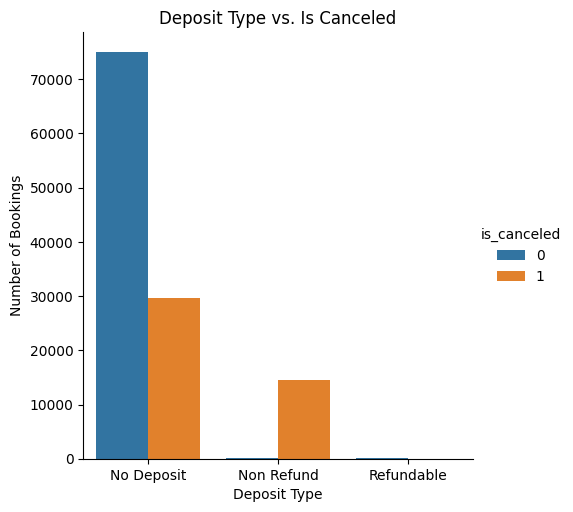

In [153]:
x = pd.read_sql('''SELECT deposit_type, is_canceled, COUNT(*) AS count
                   FROM hotel
                   GROUP BY deposit_type, is_canceled
                   ORDER BY deposit_type, is_canceled''', conn)

sns.catplot(x='deposit_type', y='count', hue='is_canceled', kind='bar', data=x)
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.title('Deposit Type vs. Is Canceled')
plt.show()

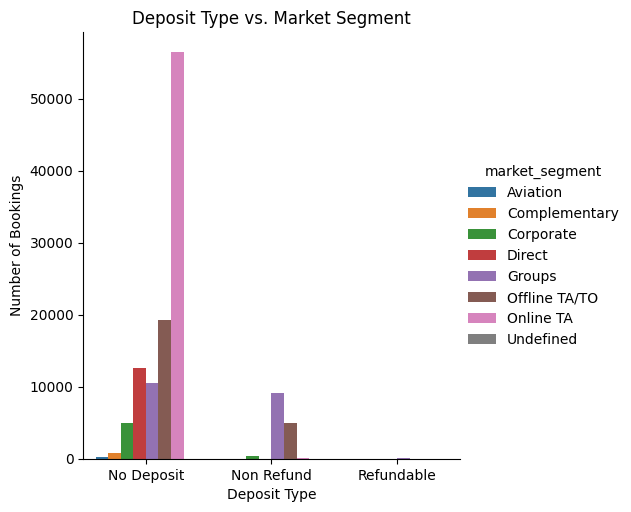

In [154]:
x = pd.read_sql('''SELECT deposit_type, market_segment, COUNT(*) AS count
                   FROM hotel
                   GROUP BY deposit_type, market_segment
                   ORDER BY deposit_type, market_segment''', conn)

sns.catplot(x='deposit_type', y='count', hue='market_segment', kind='bar', data=x)
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.title('Deposit Type vs. Market Segment')
plt.show()


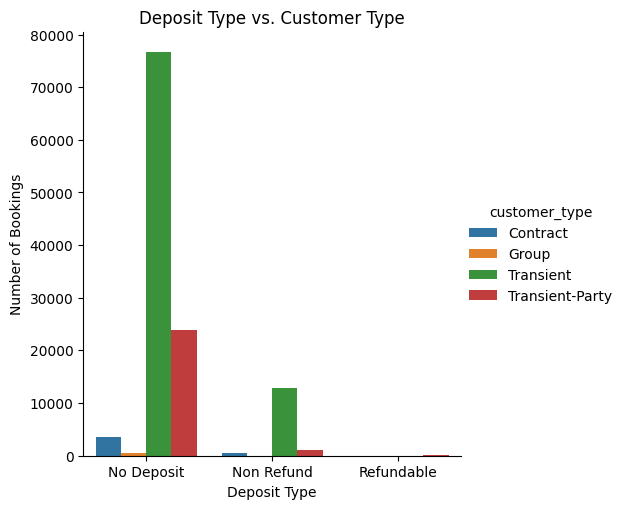

In [155]:
x = pd.read_sql('''SELECT deposit_type, customer_type, COUNT(*) AS count
                   FROM hotel
                   GROUP BY deposit_type, customer_type
                   ORDER BY deposit_type, customer_type''', conn)

sns.catplot(x='deposit_type', y='count', hue='customer_type', kind='bar', data=x)
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.title('Deposit Type vs. Customer Type')
plt.show()